# Graphene

In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:

def generate_graphene_lattice(rows, cols, a=2.46):
    """
    生成石墨烯的蜂巢晶格，並標示布拉菲格子的晶格點。
    :param rows: 晶格行數
    :param cols: 晶格列數
    :param a: 晶格常數（默認 2.46 Å）
    """
    # 碳-碳鍵長（石墨烯的最近鄰原子間距）
    bond_length = a / np.sqrt(3)  # 約 1.42 Å

    # 定義基底原子的相對位置（A 原子在晶格點上，B 原子偏移）
    basis = np.array([[0, 0], [bond_length, 0]])

    # 定義布拉菲格子（簡單六角晶格）
    lattice_vectors = np.array([
        [a, 0],
        [a / 2, a * np.sqrt(3) / 2]
    ])

    # 存儲原子位置和晶格點
    atoms = []
    lattice_points = []
    hexagons = []

    # 生成晶格
    for i in range(rows):
        for j in range(cols):
            # 計算晶格點位置
            lattice_point = i * lattice_vectors[0] + j * lattice_vectors[1]
            lattice_points.append(lattice_point)

            # 添加基底原子
            for b in basis:
                atoms.append(lattice_point + b)

            # 定義六邊形的六個頂點
            hexagon = [
                lattice_point + np.array([0, bond_length]),
                lattice_point + np.array([a / 2, bond_length / 2]),
                lattice_point + np.array([a / 2, -bond_length / 2]),
                lattice_point + np.array([0, -bond_length]),
                lattice_point + np.array([-a / 2, -bond_length / 2]),
                lattice_point + np.array([-a / 2, bond_length / 2]),
                lattice_point + np.array([0, bond_length])  # Close the hexagon
            ]
            hexagons.append(hexagon)

    return np.array(atoms), np.array(lattice_points), hexagons


def plot_graphene(rows=5, cols=5):
    """
    繪製石墨烯結構，標示晶格點，並畫出六邊形。
    """
    atoms, lattice_points, hexagons = generate_graphene_lattice(rows, cols)

    plt.figure(figsize=(8, 8))

    # 繪製碳原子
    #plt.scatter(atoms[:, 0], atoms[:, 1], c='black', label='Carbon Atoms', s=50, zorder=2)

    # 繪製晶格點
    plt.scatter(lattice_points[:, 0], lattice_points[:, 1], c='gray', marker='o', label='Lattice Points', s=50, zorder=3)

    # 繪製六邊形
    for hexagon in hexagons:
        hexagon = np.array(hexagon)
        plt.plot(hexagon[:, 0], hexagon[:, 1], 'k', lw=0.8, alpha=0.6, zorder=1)
        plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=50, zorder=3)
    plt.scatter(hexagon[:, 0], hexagon[:, 1], c='k', marker='o', s=50, zorder=3, label='Carbon Atoms')
    plt.axis('equal')
    plt.legend()
    plt.xlabel('x (Å)')
    plt.ylabel('y (Å)')
    plt.title('Graphene Lattice with Hexagons and Lattice Points')
    plt.show()


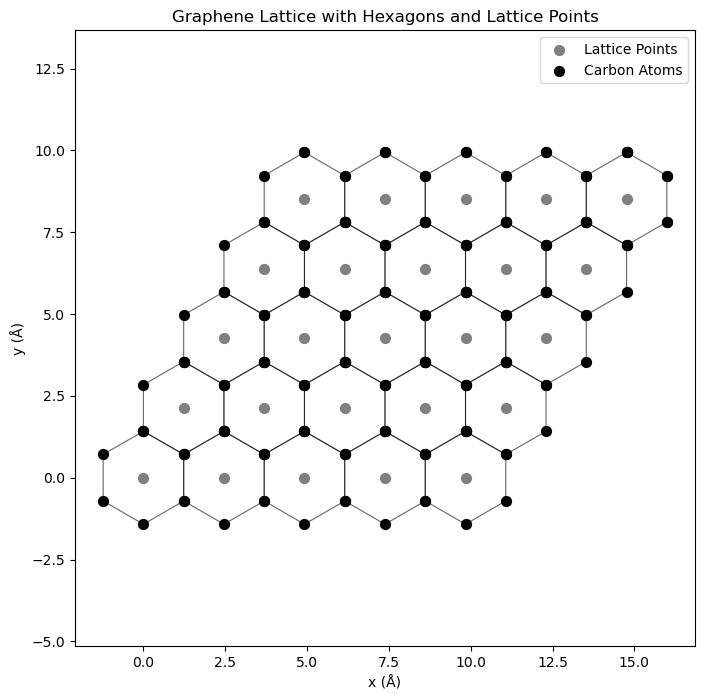

In [15]:

# 執行繪製
plot_graphene(5, 5)